In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp 
    where gggg indicates a group the passenger is travelling with and pp is their number within the group.
People in a group are often family members, but not always.
HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
CryoSleep - Indicates whether the passenger elected to be put into suspended animation 
    for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, 
    where side can be either P for Port or S for Starboard.
Destination - The planet the passenger will be debarking to.
Age - The age of the passenger.
VIP - Whether the passenger has paid for special VIP service during the voyage.
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at 
    each of the Spaceship Titanic's many luxury amenities.
Name - The first and last names of the passenger.
Transported - Whether the passenger was transported to another dimension. 
    This is the target, the column you are trying to predict.
test.csv - Personal records for the remaining one-third (~4300) of the passengers, 
    to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

In [2]:
train_dataset = pd.read_csv('train.csv')
# making test dataset
test_dataset = pd.read_csv('test.csv') 

all_data = pd.concat([train_dataset, test_dataset], ignore_index=True)
print(train_dataset.shape, test_dataset.shape, all_data.shape)

(8693, 14) (4277, 13) (12970, 14)


E:\Programms\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [10]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
PassengerId     8693 non-null object
HomePlanet      8492 non-null object
CryoSleep       8476 non-null object
Cabin           8494 non-null object
Destination     8511 non-null object
Age             8514 non-null float64
VIP             8490 non-null object
RoomService     8512 non-null float64
FoodCourt       8510 non-null float64
ShoppingMall    8485 non-null float64
Spa             8510 non-null float64
VRDeck          8505 non-null float64
Name            8493 non-null object
Transported     8693 non-null bool
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [20]:
train_dataset[(train_dataset.total_expenses.isna())&(
    train_dataset.VIP > 0)][['VIP', 'total_expenses','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

,VIP,total_expenses,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck


In [40]:
# train_dataset.VIP.value_counts()
all_data.VIP.value_counts()

False    12401
True       273
Name: VIP, dtype: int64

In [39]:
len(all_data[all_data.VIP.isna()])

296

In [3]:
train_dataset.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [ ]:
# gggg_pp parse it     
    # where gggg indicates a group the passenger is travelling with and pp is their number within the group.
    # People in a group are often family members, but not always.

1. percent ofsurvavils per groupe
2. number of persons in groupe
3. check of groups simularities in train/test
4. Family groupe flag  #split Name for surname
5. 
 


In [ ]:
Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, 
    where side can be either P for Port or S for Starboard.

In [76]:
train_dataset.Cabin.unique()  

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [252]:
# from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [216]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 14 columns):
Age             12700 non-null float64
Cabin           12671 non-null object
CryoSleep       12660 non-null object
Destination     12696 non-null object
FoodCourt       12681 non-null float64
HomePlanet      12682 non-null object
Name            12676 non-null object
PassengerId     12970 non-null object
RoomService     12707 non-null float64
ShoppingMall    12664 non-null float64
Spa             12686 non-null float64
Transported     8693 non-null object
VIP             12674 non-null object
VRDeck          12702 non-null float64
dtypes: float64(6), object(8)
memory usage: 1.4+ MB


In [214]:
train_dataset.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [4]:
# Expenses
all_data['total_expenses'] = all_data[['RoomService', 'FoodCourt', 
                                                 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

all_data['RoomServicePercent'] = all_data['RoomService'] / all_data['total_expenses']
all_data['FoodCourtPercent'] = all_data['FoodCourt'] / all_data['total_expenses']
all_data['ShoppingMallPercent'] = all_data['ShoppingMall'] / all_data['total_expenses']
all_data['SpaPercent'] = all_data['Spa'] / all_data['total_expenses']
all_data['VRDeckPercent'] = all_data['VRDeck'] / all_data['total_expenses']

In [ ]:
'HomePlanet', 'CryoSleep', 'Destination', 'VIP',
# nums to predict 
'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'

In [226]:
all_data['HomePlanet'].value_counts()

Earth     6865
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64

In [246]:
# all_data[[local_target]]

In [ ]:
train_2 = 'Transported'

In [248]:
ultimate_target = 'Transported'
local_target = 'HomePlanet'

local_df = all_data[all_data[local_target].notna()]
to_predict_df = all_data[all_data[local_target].isna()]

le = LabelEncoder()
local_df[[local_target]] = le.fit_transform(local_df[[local_target]])

trgt = local_df['HomePlanet']
trn = local_df.drop(columns = [ultimate_target, local_target])      
X_tr, X_te, y_tr, y_te = train_test_split(trn, trgt)

E:\Programms\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Programms\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Programms\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [254]:
local_cat_feat = ['Cabin', 'CryoSleep', 'Destination', 'VIP']

In [255]:
train_dataset = Pool(data = X_tr,
                     label = y_tr,
                     cat_features=local_cat_feat)

eval_dataset = Pool(data = X_te,
                     label = y_te,
                    cat_features=local_cat_feat)

CatBoostError: Invalid type for cat_feature[non-default value idx=6,feature_idx=1]=nan : cat_features must be integer or string, real number values and NaN values should be converted to string.

In [251]:
bst = XGBClassifier(n_estimators=100)
# fit model
bst.fit(X_tr, y_tr)
# make predictions
preds = bst.predict(X_te)

ValueError: DataFrame.dtypes for data must be int, float, bool or category.  When
categorical type is supplied, DMatrix parameter `enable_categorical` must
be set to `True`. Invalid columns:Cabin, CryoSleep, Destination, Name, PassengerId, VIP

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Start

In [98]:
train_dataset = pd.read_csv('train.csv')
# making test dataset
test_dataset = pd.read_csv('test.csv') 

all_data = pd.concat([train_dataset, test_dataset], ignore_index=True)
print(train_dataset.shape, test_dataset.shape, all_data.shape)

(8693, 14) (4277, 13) (12970, 14)


E:\Programms\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [99]:
# filling with mean spendings by vip-status
all_data['VRDeck'] = all_data['VRDeck'].fillna(all_data.groupby('VIP')['VRDeck'].transform('mean'))
all_data['RoomService'] = all_data['RoomService'].fillna(all_data.groupby('VIP')['RoomService'].transform('mean'))
all_data['ShoppingMall'] = all_data['ShoppingMall'].fillna(all_data.groupby('VIP')['ShoppingMall'].transform('mean'))
all_data['Spa'] = all_data['Spa'].fillna(all_data.groupby('VIP')['Spa'].transform('mean'))
all_data['FoodCourt'] = all_data['FoodCourt'].fillna(all_data.groupby('VIP')['FoodCourt'].transform('mean'))

In [100]:
# all_data.info() 

In [101]:
# Expenses
all_data['total_expenses'] = all_data[['RoomService', 'FoodCourt', 
                                                 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

all_data['RoomServicePercent'] = all_data['RoomService'] / all_data['total_expenses']
all_data['FoodCourtPercent'] = all_data['FoodCourt'] / all_data['total_expenses']
all_data['ShoppingMallPercent'] = all_data['ShoppingMall'] / all_data['total_expenses']
all_data['SpaPercent'] = all_data['Spa'] / all_data['total_expenses']
all_data['VRDeckPercent'] = all_data['VRDeck'] / all_data['total_expenses']


all_data[['RoomServicePercent', 'FoodCourtPercent', 'ShoppingMallPercent','SpaPercent'
         , 'VRDeckPercent']] = all_data[['RoomServicePercent', 'FoodCourtPercent', 
                            'ShoppingMallPercent','SpaPercent', 'VRDeckPercent']].fillna(0)

In [102]:
all_data[['total_expenses','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'RoomServicePercent',
              'FoodCourtPercent', 'ShoppingMallPercent', 'SpaPercent','VRDeckPercent']] = all_data[[
    'total_expenses','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'RoomServicePercent',
              'FoodCourtPercent', 'ShoppingMallPercent', 'SpaPercent','VRDeckPercent']].fillna(
    all_data[['total_expenses','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'RoomServicePercent',
              'FoodCourtPercent', 'ShoppingMallPercent', 'SpaPercent','VRDeckPercent']].mean())

In [103]:
all_data['Destination'] = all_data['Destination'].fillna('None')
all_data['HomePlanet'] = all_data['HomePlanet'].fillna('None')
all_data['deck'] = all_data['HomePlanet'].fillna('None')
all_data['side'] = all_data['HomePlanet'].fillna('None')


In [104]:
# Spliting few columns
all_data[['deck', 'num', 'side']] = all_data.Cabin.str.split('/', 2, expand=True)
all_data[['deck', 'num', 'side']] = all_data.Cabin.str.split('/', 2, expand=True)

all_data[['p_group', 'p_num']] = all_data.PassengerId.str.split('_', 1, expand=True) 

all_data['group_members'] = all_data.groupby('p_group')['p_group'].transform('count')
all_data['ppl_in_cabin'] = all_data.groupby('num')['num'].transform('count')

all_data['no_name'] = all_data['Name'].isna()

In [105]:
all_data['Age'] = all_data['Age'].fillna(np.mean(all_data['Age']))
all_data['ppl_in_cabin'] = all_data['ppl_in_cabin'].fillna(np.mean(all_data['ppl_in_cabin']))

In [13]:
all_data.columns

Index(['Age', 'Cabin', 'CryoSleep', 'Destination', 'FoodCourt', 'HomePlanet',
       'Name', 'PassengerId', 'RoomService', 'ShoppingMall', 'Spa',
       'Transported', 'VIP', 'VRDeck', 'total_expenses', 'RoomServicePercent',
       'FoodCourtPercent', 'ShoppingMallPercent', 'SpaPercent',
       'VRDeckPercent', 'deck', 'side', 'num', 'p_group', 'p_num',
       'group_members', 'ppl_in_cabin', 'no_name'],
      dtype='object')

In [265]:
# all_data.info()

In [106]:
to_drop = ['Cabin', 'Name', 'PassengerId']
# 'p_num'
categ_features = ['Destination', 'HomePlanet', 'deck', 'side', 'p_group']

In [107]:
all_data[categ_features] = all_data[categ_features].astype(str)
all_data = all_data.drop(to_drop, axis = 1)

In [108]:
all_data.columns

Index(['Age', 'CryoSleep', 'Destination', 'FoodCourt', 'HomePlanet',
       'RoomService', 'ShoppingMall', 'Spa', 'Transported', 'VIP', 'VRDeck',
       'total_expenses', 'RoomServicePercent', 'FoodCourtPercent',
       'ShoppingMallPercent', 'SpaPercent', 'VRDeckPercent', 'deck', 'side',
       'num', 'p_group', 'p_num', 'group_members', 'ppl_in_cabin', 'no_name'],
      dtype='object')

In [78]:
# all_data.groupby('deck')['ppl_in_cabin'].agg('mean')

In [79]:
# all_data.groupby('VIP')['ppl_in_cabin'].agg('mean')

In [17]:
# np.mean(all_data['ppl_in_cabin'])

In [100]:
all_data.columns

Index(['Age', 'CryoSleep', 'Destination', 'FoodCourt', 'HomePlanet',
       'RoomService', 'ShoppingMall', 'Spa', 'Transported', 'VIP', 'VRDeck',
       'total_expenses', 'RoomServicePercent', 'FoodCourtPercent',
       'ShoppingMallPercent', 'SpaPercent', 'VRDeckPercent', 'deck', 'side',
       'num', 'p_group', 'p_num', 'group_members', 'ppl_in_cabin', 'no_name'],
      dtype='object')

In [101]:
# all_data[all_data['Transported'].notna()].drop(columns = ['Transported'])

In [112]:
train_df = all_data[all_data['Transported'].notna()]
test_df = all_data[all_data['Transported'].isna()]
print(train_df.shape, test_df.shape)

(8693, 25) (4277, 25)


In [113]:
from sklearn.model_selection import train_test_split, ShuffleSplit
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import PolynomialFeatures

In [114]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(['Transported'], axis = 1)
                                                    , train_df.Transported, shuffle= True)

In [21]:
# train_dataset = Pool(data=train_df.drop(['Transported'], axis = 1),
#                      label=train_df.Transported.astype(bool),
#                      cat_features=categ_features)

# eval_dataset = Pool(data=test_df.drop(['Transported'], axis = 1),
#                      label=test_df.Transported.astype(bool),
#                     cat_features=categ_features)

In [22]:
train_dataset = Pool(data = X_train,
                     label = y_train.astype(bool),
                     cat_features=categ_features)

eval_dataset = Pool(data = X_test,
                     label = y_test.astype(bool),
                    cat_features=categ_features)

In [23]:
eval_dataset.shape

(2174, 24)

In [24]:
# X_train, X_test, y_train, y_test = train_test_split(train_df.drop(['Transported'], axis = 1)
#                                                     , train_df.Transported, shuffle= True)

# eval_dataset = Pool(X_test, y_test.astype(str))

# print(X_train.shape, X_test.shape)

In [25]:
cat_model = CatBoostClassifier(verbose = False, eval_metric='Accuracy')

In [32]:
# cat_model.score(train_dataset)

In [26]:
cat_model.fit(train_dataset)

In [27]:
print(cat_model.get_best_iteration())

None


In [28]:
train_preds = cat_model.predict(X_train)
test_preds = cat_model.predict(X_test)

In [29]:
print('Правильность на обучающем наборе: {:.3f}'.format(accuracy_score(train_preds, y_train.astype(str))))
print('Правильность на обучающем наборе: {:.3f}'.format(accuracy_score(test_preds, y_test.astype(str))))

Правильность на обучающем наборе: 0.879
Правильность на обучающем наборе: 0.831


In [37]:
test_df.columns

Index(['Age', 'CryoSleep', 'Destination', 'FoodCourt', 'HomePlanet',
       'RoomService', 'ShoppingMall', 'Spa', 'Transported', 'VIP', 'VRDeck',
       'total_expenses', 'RoomServicePercent', 'FoodCourtPercent',
       'ShoppingMallPercent', 'SpaPercent', 'VRDeckPercent', 'deck', 'side',
       'num', 'p_group', 'p_num', 'group_members', 'ppl_in_cabin', 'no_name'],
      dtype='object')

In [56]:
fin_pred1 = cat_model.predict(test_df.drop(columns = ['Transported'])) 

In [57]:
fin_pred1 = test_dataset[['PassengerId']].join(pd.DataFrame(fin_pred1, columns = ['Transported']))
fin_pred1.to_csv('sample_submission.csv', index = False)

# fin_pred1 0.803 Score in Kaggle


# Adding polynomes

In [115]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(['Transported'], axis = 1)
                                                    , train_df.Transported, shuffle= True)

num_cols = train_df.drop(['Transported'], axis = 1).columns[X_train.dtypes != object].tolist()
# X_train[num_cols].info()

In [117]:
X_train_polyed = pd.DataFrame(poly.fit_transform(X_train[num_cols]))
X_test_polyed = pd.DataFrame(poly.fit_transform(X_test[num_cols]))

# X_train = X_train.drop(columns = num_cols)#.reset_index(drop = True)
# X_test = X_test.drop(columns = num_cols)#.reset_index(drop = True)

In [179]:
X_train_polyed.shape

(6519, 135)

In [118]:
X_train = X_train.join(X_train_polyed)
X_test = X_test.join(X_test_polyed)

In [119]:
# X_test

In [120]:
train_dataset = Pool(data = X_train,
                     label = y_train.astype(bool),
                     cat_features=categ_features)

eval_dataset = Pool(data = X_test,
                     label = y_test.astype(bool),
                    cat_features=categ_features)

In [121]:
cat_model2 = CatBoostClassifier(verbose = False, eval_metric='Accuracy')

In [122]:
cat_model2.fit(train_dataset)

In [87]:
print(cat_model2.get_best_iteration())

None


In [123]:
dd = {'feat': X_train.columns, 'rate': cat_model2.get_feature_importance()}

In [124]:
pd.DataFrame(dd).sort_values(['rate'], ascending = False).head(10)
#     dict('feat': X_train.columns, 'rate': cat_model.get_feature_importance()))

,feat,rate
10,total_expenses,11.332011
12,FoodCourtPercent,8.074596
16,deck,6.983501
1,CryoSleep,6.418913
4,HomePlanet,6.084177
18,num,5.907374
13,ShoppingMallPercent,4.362285
7,Spa,4.110067
17,side,3.595436
0,Age,3.403251


In [176]:
train_preds = cat_model2.predict(X_train)
test_preds = cat_model2.predict(X_test)

In [177]:
print('Правильность на обучающем наборе: {:.3f}'.format(accuracy_score(train_preds, y_train.astype(str))))
print('Правильность на обучающем наборе: {:.3f}'.format(accuracy_score(test_preds, y_test.astype(str))))

Правильность на обучающем наборе: 0.895
Правильность на обучающем наборе: 0.808


In [ ]:
Basic catboost
# Правильность на обучающем наборе: 0.863
# Правильность на обучающем наборе: 0.812

In [180]:
test_df_polyed = pd.DataFrame(poly.fit_transform(test_df[num_cols]))
test_df1 = test_df.join(test_df_polyed).drop(['Transported'], axis = 1)

(4277, 135)

In [190]:
fin_pred2 = cat_model2.predict(test_df1)
fin_pred2 = test_dataset[['PassengerId']].join(pd.DataFrame(fin_pred2, columns = ['Transported']))
fin_pred2.to_csv('sample_submission2.csv', index = False)
# тот же результат

In [ ]:
from catboost import CatBoostRegressor
from sklearn.linear_model import ElasticNet, ElasticNetCV, MultiTaskElasticNetCV, LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

In [ ]:
# ll = cat_cols.columns.tolist()
cat_model = CatBoostRegressor(n_estimators = 500, cat_features = cat_cols.tolist()
#                               cat_cols
                             )

In [53]:
# all_data.info()

In [35]:
# if surname is the same cabin is the same
# if cabin is NA and both next and previos cabins are the same then u can fill it 
# is there only VIP cabins with no not VIPs?
all_data.loc[12947:12952, ['Name', 'HomePlanet', 'Age', 'Cabin', 'CryoSleep', 'Destination', 'Transported']]

,Name,HomePlanet,Age,Cabin,CryoSleep,Destination,Transported
12947,Joana Garnettiz,Earth,10.0,G/1501/P,False,TRAPPIST-1e,NaN
12948,Ricke Emenez,Earth,3.0,G/1501/P,True,55 Cancri e,NaN
12949,Herina Emenez,Earth,16.0,G/1501/P,True,TRAPPIST-1e,NaN
12950,Marlie Emenez,Earth,26.0,G/1501/P,False,TRAPPIST-1e,NaN
12951,Caseye Emenez,Earth,14.0,NaN,True,TRAPPIST-1e,NaN
12952,Blance Garnettiz,Earth,0.0,G/1501/P,False,55 Cancri e,NaN


In [28]:
all_data.loc[1517:1590,['Name', 'Cabin']]

,Name,Cabin
1517,Furuson Entenedy,E/101/P
1518,Arraid Entenedy,E/101/P
1519,Judya Josey,NaN
1520,Duckes Conie,F/321/P
1521,Kencey Lopelases,F/322/P
1522,Therta Harperez,G/259/P
1523,Terina Lopelases,G/259/P
1524,Ots Blan,D/53/P
1525,Vanard Hinglendez,G/249/S
1526,Jeane Dukertyler,F/308/S


In [31]:
# all_data.loc[1117:1130,['Name', 'Cabin']]

In [32]:
all_data.columns

Index(['Age', 'Cabin', 'CryoSleep', 'Destination', 'FoodCourt', 'HomePlanet',
       'Name', 'PassengerId', 'RoomService', 'ShoppingMall', 'Spa',
       'Transported', 'VIP', 'VRDeck', 'total_expenses', 'RoomServicePercent',
       'FoodCourtPercent', 'ShoppingMallPercent', 'SpaPercent',
       'VRDeckPercent', 'no_name', 'deck', 'num', 'side', 'p_group', 'p_num',
       'group_members', 'ppl_in_cabin'],
      dtype='object')

In [43]:
all_data[all_data['VIP'] == 1]['ppl_in_cabin'].value_counts()

16.0    27
18.0    25
19.0    23
14.0    20
21.0    20
20.0    20
17.0    18
15.0    17
6.0     13
4.0     12
13.0    11
23.0     9
24.0     8
8.0      7
2.0      5
12.0     5
22.0     5
9.0      4
7.0      4
10.0     3
26.0     3
28.0     2
11.0     2
27.0     1
34.0     1
25.0     1
Name: ppl_in_cabin, dtype: int64

In [39]:
all_data['ppl_in_cabin'].value_counts()

4.0     2036
6.0     1344
5.0      970
7.0      721
16.0     688
8.0      560
20.0     520
17.0     493
14.0     490
18.0     486
19.0     475
2.0      464
13.0     442
21.0     420
15.0     420
9.0      333
23.0     253
22.0     242
11.0     231
3.0      225
24.0     192
10.0     170
12.0     156
1.0       93
27.0      81
28.0      56
25.0      50
34.0      34
26.0      26
Name: ppl_in_cabin, dtype: int64

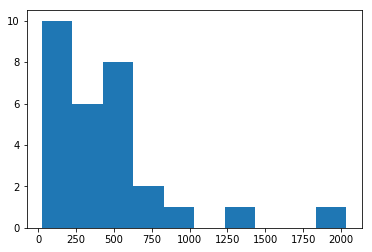

<Figure size 2880x2880 with 0 Axes>

In [38]:
plt.hist(all_data['ppl_in_cabin'].value_counts())
plt.figure(figsize=(40, 40))
plt.show()

In [33]:
all_data['deck'].unique()

array(['B', 'F', 'A', 'G', nan, 'E', 'D', 'C', 'T'], dtype=object)

In [ ]:
# filling NaN with zeros for expenses
train_dataset['total_expenses','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'RoomServicePercent',
              'FoodCourtPercent', 'ShoppingMallPercent', 'SpaPercent','VRDeckPercent'].fillna(0, inplace = True)
test_dataset['total_expenses','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'RoomServicePercent',
              'FoodCourtPercent', 'ShoppingMallPercent', 'SpaPercent','VRDeckPercent'].fillna(0, inplace = True)